In [16]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("../data/processed/german_credit_data_processed.csv")

In [9]:
#Creating the X and y variables
X = df.drop('Risk', axis=1).values
y = df["Risk"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


=== LR ===
Accuracy  : 0.7133 (± 0.0724)
Recall    : 0.8878 (± 0.0816)
Precision : 0.7476 (± 0.0578)
F1        : 0.8097 (± 0.0557)
Roc_auc   : 0.7073 (± 0.0888)

=== LDA ===
Accuracy  : 0.7040 (± 0.0682)
Recall    : 0.8750 (± 0.0771)
Precision : 0.7456 (± 0.0575)
F1        : 0.8029 (± 0.0514)
Roc_auc   : 0.7089 (± 0.0861)

=== KNN ===
Accuracy  : 0.6560 (± 0.0465)
Recall    : 0.8273 (± 0.0460)
Precision : 0.7200 (± 0.0508)
F1        : 0.7687 (± 0.0386)
Roc_auc   : 0.6121 (± 0.0571)

=== CART ===
Accuracy  : 0.6373 (± 0.0590)
Recall    : 0.7220 (± 0.0740)
Precision : 0.7495 (± 0.0588)
F1        : 0.7330 (± 0.0500)
Roc_auc   : 0.5872 (± 0.0601)

=== NB ===
Accuracy  : 0.6720 (± 0.0373)
Recall    : 0.7346 (± 0.0777)
Precision : 0.7865 (± 0.0572)
F1        : 0.7552 (± 0.0356)
Roc_auc   : 0.6697 (± 0.0578)

=== RF ===
Accuracy  : 0.7053 (± 0.0375)
Recall    : 0.8743 (± 0.0452)
Precision : 0.7461 (± 0.0408)
F1        : 0.8040 (± 0.0305)
Roc_auc   : 0.6768 (± 0.0624)

=== SVM ===
Accuracy  :

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:10:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:10:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:10:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 


=== XGB ===
Accuracy  : 0.6840 (± 0.0446)
Recall    : 0.8123 (± 0.0575)
Precision : 0.7550 (± 0.0524)
F1        : 0.7805 (± 0.0350)
Roc_auc   : 0.6679 (± 0.0662)


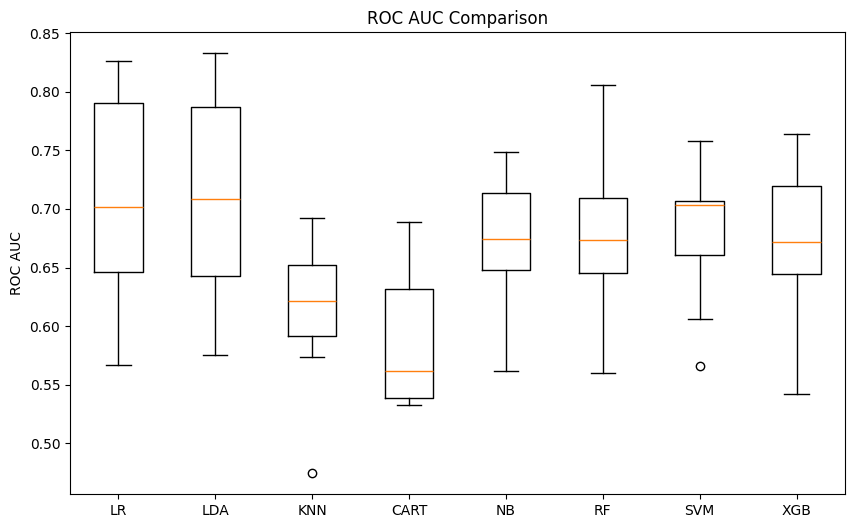

In [20]:

# Suppress convergence warnings once we've adjusted settings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Seed for reproducibility
seed = 7

# Helper to build a scaler+model pipeline
def make_pipeline(clf):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('clf', clf)
    ])

# Prepare models with increased max_iter, random_state, and probability=True where needed
model_defs = [
    ('LR',  LogisticRegression(solver='lbfgs', max_iter=500, random_state=seed)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=seed)),
    ('NB',  GaussianNB()),
    ('RF',  RandomForestClassifier(n_estimators=200, random_state=seed)),
    ('SVM', SVC(gamma='auto', probability=True, random_state=seed)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=200, random_state=seed))
]

# Wrap each model in a pipeline
models = [(name, make_pipeline(clf)) for name, clf in model_defs]

# Define cross-validation and scoring metrics
kfold   = KFold(n_splits=10, shuffle=True, random_state=seed)
scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']

results = {}
for name, pipeline in models:
    cv_results = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=kfold,
        scoring=scoring,
        return_train_score=False,
        n_jobs=-1
    )
    results[name] = cv_results
    # Print mean & std for each metric
    print(f"\n=== {name} ===")
    for metric in scoring:
        mean = cv_results[f'test_{metric}'].mean()
        std  = cv_results[f'test_{metric}'].std()
        print(f"{metric.capitalize():<10}: {mean:.4f} (± {std:.4f})")

# Boxplot comparison for ROC AUC
plt.figure(figsize=(10,6))
plt.title('ROC AUC Comparison')
# Extract the list of ROC AUC arrays in the same order as model names
roc_vals = [results[name]['test_roc_auc'] for name, _ in models]
model_names = [name for name, _ in models]
plt.boxplot(roc_vals, labels=model_names)
plt.ylabel('ROC AUC')
plt.show()

# **7.1 Model 1 :** <a id="Modelling 1"></a> <br>
- Using Random Forest to predictict the credit score 
- Some of Validation Parameters

In [22]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.971 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.952 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.923 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.981 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.981 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.971 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.943 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.942 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.971 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.990 total time=   0.0s
[CV 1/5] END max_depth=3, max_feature

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [4, 7, 15, 20],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='recall', verbose=4)

In [23]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9904578754578754
{'max_depth': 3, 'max_features': 4, 'n_estimators': 50}


In [24]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=15, random_state=2)

In [25]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.7


[[ 22  50]
 [ 25 153]]


0.8360655737704918


# **7.2 Model 2:** <a id="Modelling 2"></a> <br>